# Step 4: Feature Extraction
If you have unstructured data then in this step you need to extract features from the data to generate a dataset

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np

data = r'C:\Users\jimofunanya\Desktop\Data Science Class 2\household_power_consump.CSV'
household = pd.read_csv(data, sep=';', parse_dates=[['Date', 'Time']], low_memory=False)
household.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Step 5: Data cleaning
Some points to keep in mind:

[ ] Find missing values. <br>
[ ] Find NaN and 0 values. <br>
[ ] Do all columns have the same dtypes? <br>
[ ] Convert dates to datetime types. <br>
[ ] You can use the python package arrow or datetime. <br>
[ ] Convert categorical variables to type 'category' if working with pandas. <br>
[ ] Convert strings to ints or floats if they represent numbers. <br>
[ ] Standardize strings <br>
[ ] Convert them to lower case if possible. <br>
[ ] Replace spaces with underscores or dashes. <br>
[ ] Remove white spaces around the string this is very critical. <br>
[ ] Check of inconsistent spellings typically done manually. <br>
[ ] Look for duplicate rows or columns.<br>
[ ] Look for preprocessed columns; example: A categorical column that has been duplicated with categorical labels <br>

In [38]:
household.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [39]:
household.replace('?', np.NaN, inplace=True)

In [40]:
household.fillna(method='bfill', inplace=True)
household.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [41]:
household['Global_active_power'] = household['Global_active_power'].astype(float)
household['Global_reactive_power'] = household['Global_reactive_power'].astype(float)
household['Voltage'] = household['Voltage'].astype(float)
household['Global_intensity'] = household['Global_intensity'].astype(float)
household['Sub_metering_1'] = household['Sub_metering_1'].astype(float)
household['Sub_metering_2'] = household['Sub_metering_2'].astype(float)
household['Sub_metering_3'] = household['Sub_metering_3'].astype(float)

In [42]:
household.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


# Step 6: Data preperation
[ ] Convert categorical features to dummy indices if you are doing regression or assign numerical labels if you are doing classification <br>
[ ] Do test train split to generate a test set. Further do a train validation split, you will need to run the test train split function from sklearn twice for this purpose <br>

In [79]:
# Look for correlation between the active power and the metering 
# X = household.drop(columns=['Sub_metering_1'])

X = household['Global_active_power']
y = household['Sub_metering_1']
z = household['Sub_metering_2']
zi = household['Sub_metering_3']

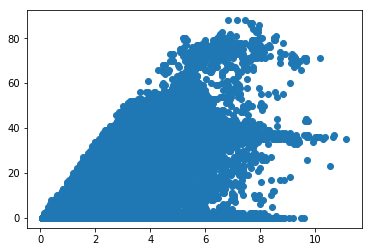

In [80]:
#Generating a Scatterplot to visualize the relationship between all the feature and target.
plt.scatter(X, y)
plt.show()

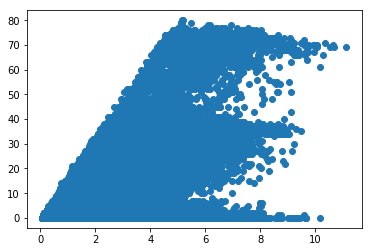

In [81]:
plt.scatter(X, z)
plt.show()

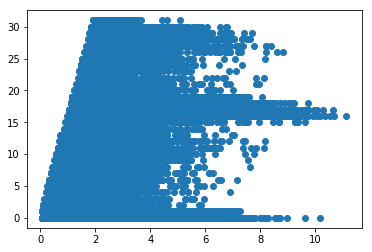

In [82]:
plt.scatter(X, zi)
plt.show()

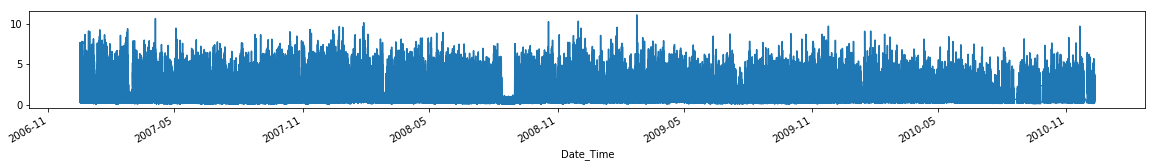

In [59]:
household.Global_active_power.plot(figsize=(20,2));

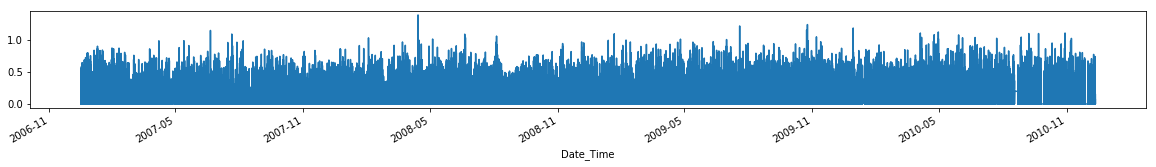

In [60]:
household.Global_reactive_power.plot(figsize=(20,2));


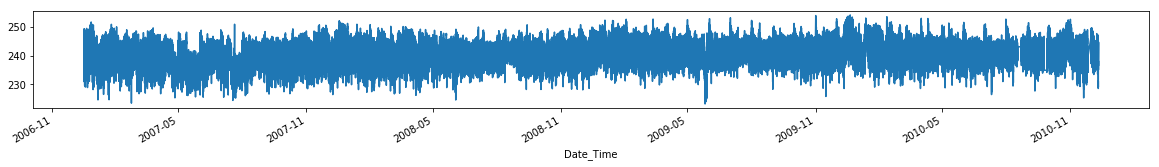

In [61]:
household.Voltage.plot(figsize=(20,2));

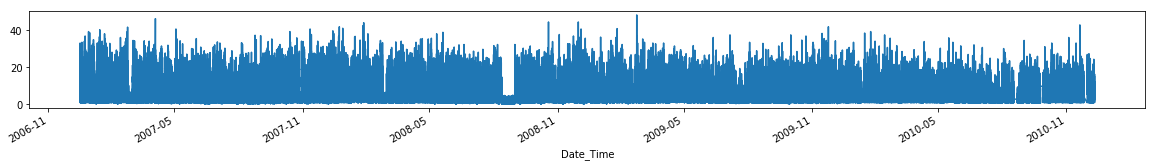

In [62]:
household.Global_intensity.plot(figsize=(20,2));

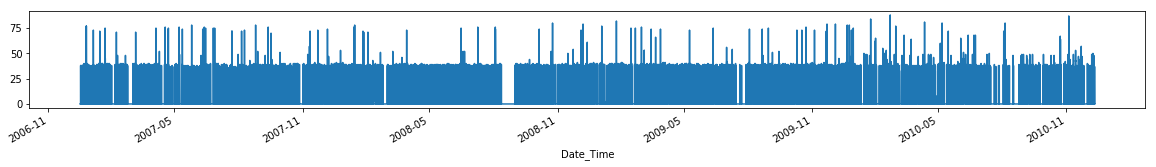

In [63]:
household.Sub_metering_1.plot(figsize=(20,2));

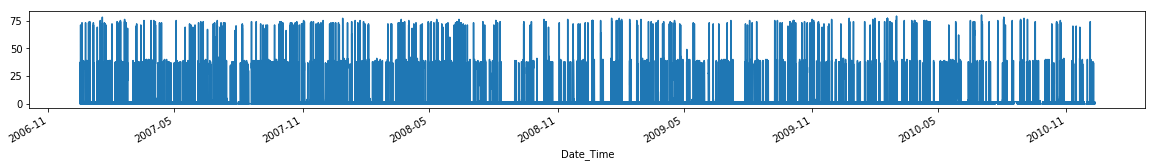

In [64]:
household.Sub_metering_2.plot(figsize=(20,2));

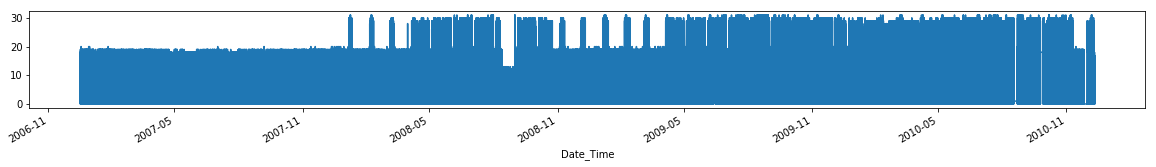

In [65]:
household.Sub_metering_3.plot(figsize=(20,2));

In [85]:
X = household.drop(columns=['Global_active_power', 'Voltage','Global_reactive_power','Global_intensity'])
y = household['Global_active_power']

In [87]:
# perform test train split 
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, y, train_size=0.80, test_size =0.20, random_state =0, shuffle=True)


trainx_shape = train_x.shape
testx_shape = test_x.shape
trainy_shape = train_y.shape
testy_shape =test_y.shape

print("Training data X and y shapes are {} and {}".format(trainx_shape, trainy_shape))
print("Testing data X and y shapes are {} and {}".format(testx_shape, testy_shape))

Training data X and y shapes are (1660207, 3) and (1660207,)
Testing data X and y shapes are (415052, 3) and (415052,)


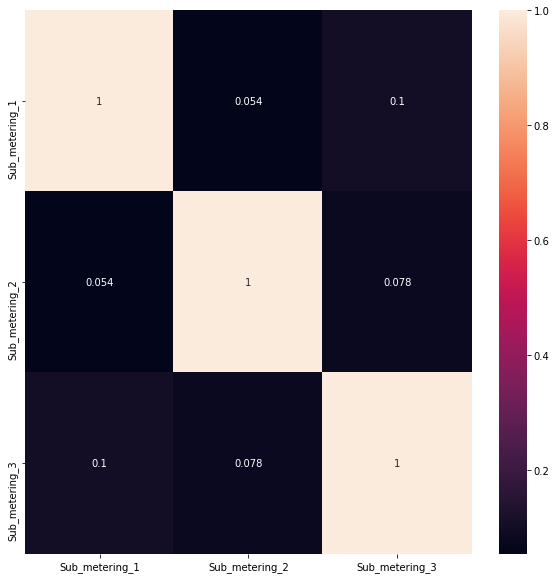

In [88]:
corr_matrix = train_x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [96]:
# Use Linear Regression to train and predict
lr = LinearRegression()
lr.fit(train_x, train_y)
preds = lr.predict(test_x)

#Finding out the Root mean Square error
rmse = np.sqrt(mean_squared_error(preds, test_y))
print("Root mean squared error is {:.4f}".format(rmse))

Root mean squared error is 0.5587
